In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [3]:
claims=pd.read_csv(r"C:\Users\PC-ASUS\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
cust_demographic=pd.read_csv(r"C:\Users\PC-ASUS\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [4]:
cust_demographic.rename(columns={'CUST_ID': 'customer_id'}, inplace=True)

In [5]:
temp_df=pd.merge(left=claims,right=cust_demographic,how='inner',on='customer_id')

In [6]:
#2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [7]:
temp_df

claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1080  62020796     79539873  Other driver error  09/06/2018       Auto   
1081  63269067     42364152        Other causes  05/09/2017       Home   
1082  22690595     19888166  Other driver error  05/15/2017       Auto   
1083  12376894     11256802  Other driver error  04/18/2017       Auto   
1084  63226031     61575264      Natural causes  03/16/2017       Auto   

     police_report     claim_type claim_amount  total_policy_claims  \
0               No  Material only        $2980                  1.0   
1          Unknown  Material only        $2980                  3.0   
2               No  Material only      $3369.5                  1.0   
3               No  Material only        $1680                  1.0   
4               No  Material only        $2680                  1.0   
...            ...            ...          ...                  ...   
1080           Yes  Material only        $1770                  1.0   
1081            No  Material only        $2800                  1.0   
1082           Yes    Injury only       $33080                  2.0   
1083            No  Material only        $2840                  4.0   
1084            No  Material only        $1490                  1.0   

     fraudulent  gender DateOfBirth State       Contact   Segment  
0            No  Female   12-Jan-79    VT  789-916-8172  Platinum  
1            No  Female   13-Jan-70    ME  265-543-1264    Silver  
2           Yes  Female   11-Mar-84    TN  798-631-4758    Silver  
3            No  Female   01-May-86    MA  413-187-7945    Silver  
4            No    Male   13-May-77    NV  956-871-8691      Gold  
...         ...     ...         ...   ...           ...       ...  
1080         No  Female   15-Mar-81    ND  459-425-4319  Platinum  
1081         No  Female   07-Jul-96    ID  529-462-1635    Silver  
1082         No    Male   11-Apr-90    WI  712-651-9613      Gold  
1083         No  Female   22-Oct-64    LA  469-345-5617    Silver  
1084         No    Male   12-Jul-95    WY  182-385-1392      Gold  

[1085 rows x 15 columns]

In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [9]:
temp_df.claim_date = pd.to_datetime(temp_df.claim_date)
temp_df. DateOfBirth  = pd.to_datetime(temp_df. DateOfBirth )

In [10]:
import pandas as pd

# Assuming `df` is your DataFrame
temp_df['claim_id'] = temp_df['claim_id'].astype(str)
temp_df['customer_id'] = temp_df['customer_id'].astype(str)
temp_df['incident_cause'] = temp_df['incident_cause'].astype('category')
temp_df['claim_date'] = pd.to_datetime(temp_df['claim_date'])
temp_df['claim_area'] = temp_df['claim_area'].astype('category')
temp_df['police_report'] = temp_df['police_report'].astype('category')
temp_df['claim_type'] = temp_df['claim_type'].astype('category')

temp_df['total_policy_claims'] = temp_df['total_policy_claims'].astype(float)
temp_df['fraudulent'] = temp_df['fraudulent'].astype('category')
temp_df['gender'] = temp_df['gender'].astype('category')
temp_df['DateOfBirth'] = pd.to_datetime(temp_df['DateOfBirth'])
temp_df['State'] = temp_df['State'].astype('category')
temp_df['Contact'] = temp_df['Contact'].astype(str)
temp_df['Segment'] = temp_df['Segment'].astype('category')


In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   object        
 1   customer_id          1085 non-null   object        
 2   incident_cause       1085 non-null   category      
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   category      
 5   police_report        1085 non-null   category      
 6   claim_type           1085 non-null   category      
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   category      
 10  gender               1085 non-null   category      
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   category      
 13  Contact              1085 non-nul

In [12]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [13]:
temp_df

claim_id customer_id      incident_cause claim_date claim_area  \
0     54004764    21868593        Driver error 2017-11-27       Auto   
1     33985796    75740424               Crime 2018-10-03       Home   
2     53522022    30308357  Other driver error 2018-02-02       Auto   
3     13015401    47830476      Natural causes 2018-06-17       Auto   
4     22890252    19269962               Crime 2018-01-13       Auto   
...        ...         ...                 ...        ...        ...   
1080  62020796    79539873  Other driver error 2018-09-06       Auto   
1081  63269067    42364152        Other causes 2017-05-09       Home   
1082  22690595    19888166  Other driver error 2017-05-15       Auto   
1083  12376894    11256802  Other driver error 2017-04-18       Auto   
1084  63226031    61575264      Natural causes 2017-03-16       Auto   

     police_report     claim_type claim_amount  total_policy_claims  \
0               No  Material only        $2980                  1.0   
1          Unknown  Material only        $2980                  3.0   
2               No  Material only      $3369.5                  1.0   
3               No  Material only        $1680                  1.0   
4               No  Material only        $2680                  1.0   
...            ...            ...          ...                  ...   
1080           Yes  Material only        $1770                  1.0   
1081            No  Material only        $2800                  1.0   
1082           Yes    Injury only       $33080                  2.0   
1083            No  Material only        $2840                  4.0   
1084            No  Material only        $1490                  1.0   

     fraudulent  gender DateOfBirth State       Contact   Segment  
0            No  Female  1979-01-12    VT  789-916-8172  Platinum  
1            No  Female  2070-01-13    ME  265-543-1264    Silver  
2           Yes  Female  1984-03-11    TN  798-631-4758    Silver  
3            No  Female  1986-05-01    MA  413-187-7945    Silver  
4            No    Male  1977-05-13    NV  956-871-8691      Gold  
...         ...     ...         ...   ...           ...       ...  
1080         No  Female  1981-03-15    ND  459-425-4319  Platinum  
1081         No  Female  1996-07-07    ID  529-462-1635    Silver  
1082         No    Male  1990-04-11    WI  712-651-9613      Gold  
1083         No  Female  2064-10-22    LA  469-345-5617    Silver  
1084         No    Male  1995-07-12    WY  182-385-1392      Gold  

[1085 rows x 15 columns]

In [14]:
#4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [15]:
temp_df['alter_flag'] = temp_df.apply(lambda row: 1 if row['claim_type'] == 'Injury only' and row['police_report'] in ['Yes'] else 0, axis=1)

In [16]:
count=temp_df['alter_flag'].sum()
count

70

In [17]:
#5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. 
#However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in
#the databased on the customer ID column.

In [18]:
# Sort by customer_id and claim_date (most recent first)
temp_df = temp_df.sort_values(by=['customer_id', 'claim_date'], ascending=[True, False])

# Drop duplicate records, keeping the first (most recent) record for each customer_id
temp_df = temp_df.drop_duplicates(subset=['customer_id'], keep='first')

# View the resulting DataFrame
print(temp_df.head())

     claim_id customer_id  incident_cause claim_date claim_area police_report  \
888  77526829    10149231    Other causes 2018-04-24       Auto       Unknown   
985  50022306    10198314    Other causes 2018-05-01       Auto       Unknown   
565  26308516    10330113    Other causes 2017-12-17       Auto            No   
293  38641457    10462042    Other causes 2018-08-03       Home            No   
22   46956597    10665308  Natural causes 2018-07-20       Auto            No   

              claim_type claim_amount  total_policy_claims fraudulent  gender  \
888  Material and injury       $34780                  3.0         No  Female   
985          Injury only       $28658                  1.0        Yes  Female   
565  Material and injury       $29060                  3.0         No  Female   
293        Material only        $2410                  1.0         No  Female   
22         Material only          NaN                  1.0         No    Male   

    DateOfBirth State     

In [19]:
temp_df.size

17248

In [20]:
#6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [21]:
temp_df.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alter_flag              0
dtype: int64

In [22]:
temp_df

claim_id customer_id  incident_cause claim_date claim_area police_report  \
888  77526829    10149231    Other causes 2018-04-24       Auto       Unknown   
985  50022306    10198314    Other causes 2018-05-01       Auto       Unknown   
565  26308516    10330113    Other causes 2017-12-17       Auto            No   
293  38641457    10462042    Other causes 2018-08-03       Home            No   
22   46956597    10665308  Natural causes 2018-07-20       Auto            No   
..        ...         ...             ...        ...        ...           ...   
698   4549014    99674324    Other causes 2018-07-07       Auto            No   
999  35453672    99723844  Natural causes 2018-01-06       Auto           Yes   
68   37305754    99761663  Natural causes 2018-04-04       Auto            No   
936  22960702    99892000    Driver error 2017-11-13       Auto            No   
747  47262068    99961993    Driver error 2018-10-23       Home            No   

              claim_type claim_amount  total_policy_claims fraudulent  gender  \
888  Material and injury       $34780                  3.0         No  Female   
985          Injury only       $28658                  1.0        Yes  Female   
565  Material and injury       $29060                  3.0         No  Female   
293        Material only        $2410                  1.0         No  Female   
22         Material only          NaN                  1.0         No    Male   
..                   ...          ...                  ...        ...     ...   
698          Injury only       $21480                  1.0         No    Male   
999  Material and injury       $14360                  1.0         No  Female   
68         Material only        $1242                  1.0        Yes  Female   
936        Material only        $2415                  2.0        Yes    Male   
747        Material only        $2310                  1.0         No    Male   

    DateOfBirth State       Contact   Segment  alter_flag  
888  1992-03-22    FL  291-942-3485  Platinum           0  
985  1980-11-10    WI  176-861-1936  Platinum           0  
565  1996-02-23    ID  124-294-1973  Platinum           0  
293  2064-06-06    WA  351-316-3172  Platinum           0  
22   1999-06-21    CT  324-971-8395    Silver           0  
..          ...   ...           ...       ...         ...  
698  2065-01-28    UT  517-562-4916    Silver           0  
999  2066-06-19    HI  457-752-1374      Gold           0  
68   2063-11-18    NC  643-246-4718    Silver           0  
936  1995-06-08    OR  395-246-6172      Gold           0  
747  1995-06-10    AL  234-943-2876  Platinum           0  

[1078 rows x 16 columns]

In [70]:
temp_df['claim_amount'] = temp_df['claim_amount'].fillna(temp_df['claim_amount'].mean())


In [71]:
temp_df['total_policy_claims'] = temp_df['total_policy_claims'].fillna(temp_df['total_policy_claims'].mean())


In [75]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 888 to 747
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   object        
 1   customer_id          1078 non-null   object        
 2   incident_cause       1078 non-null   category      
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   category      
 5   police_report        1078 non-null   category      
 6   claim_type           1078 non-null   category      
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1078 non-null   float64       
 9   fraudulent           1078 non-null   category      
 10  gender               1078 non-null   category      
 11  DateOfBirth          1078 non-null   datetime64[ns]
 12  State                1078 non-null   category      
 13  Contact              1078 non-null   

In [72]:
temp_df.isnull().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
alter_flag               0
Age                      0
Age_Category           401
age                      0
age_group                0
month_year               0
dtype: int64

In [78]:
temp_df['Age_Category'] = temp_df['Age_Category'].astype(str)

In [ ]:
7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [ ]:
import pandas as pd
from datetime import datetime

# Ensure DateOfBirth is in datetime format
temp_df['DateOfBirth'] = pd.to_datetime(temp_df['DateOfBirth'], errors='coerce')

# Calculate the age of customers in years
current_year = datetime.now().year
temp_df['Age'] = current_year - temp_df['DateOfBirth'].dt.year

# Categorize based on age
temp_df['Age_Category'] = pd.cut(
    temp_df['Age'],
    bins=[0, 18, 30, 60, float('inf')],
    labels=['Children', 'Youth', 'Adult', 'Senior'],
    right=False  # Include lower bound, exclude upper bound
)

# View the updated DataFrame
print(temp_df[['DateOfBirth', 'Age', 'Age_Category']].head())


In [ ]:
8. What is the average amount claimed by the customers from various 
segments?


In [ ]:
temp_df.info()

In [ ]:
# Group by 'Segment' and calculate the mean of 'ClaimAmount'
average_claims_by_segment = temp_df.groupby('Segment')['claim_amount'].mean().reset_index()

# Display the result
print(average_claims_by_segment)


In [43]:
temp_df['claim_amount'] = temp_df['claim_amount'].replace('[\$,]', '', regex=True).astype(float)

In [44]:
9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.


SyntaxError: invalid decimal literal (2115038450.py, line 2)

In [45]:
# Define the threshold date (1st October 2018 minus 20 days)
threshold_date = pd.to_datetime('2018-10-01') - timedelta(days=20)

# Filter claims that were done at least 20 days prior to 1st October 2018
filtered_df = temp_df[temp_df['claim_date'] <= threshold_date]

# Calculate the total claim amount based on incident cause
total_claims_by_cause = filtered_df.groupby('incident_cause')['claim_amount'].sum().reset_index()

# Display the result
print(total_claims_by_cause)

       incident_cause  claim_amount
0               Crime      659430.0
1        Driver error     3165830.0
2      Natural causes     1200471.5
3        Other causes     3485619.0
4  Other driver error     3115014.0


In [46]:
10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes?

SyntaxError: invalid syntax (722873096.py, line 1)

In [47]:
# Calculate the age of customers (assuming current year is 2025)
current_year = 2025
temp_df['Age'] = current_year - temp_df['DateOfBirth'].dt.year

# Categorize customers into age groups
temp_df['Age_Category'] = pd.cut(
    temp_df['Age'],
    bins=[0, 18, 30, 60, float('inf')],
    labels=['Children', 'Youth', 'Adult', 'Senior'],
    right=False
)

# Filter for adults from TX, DE, and AK who have a driver-related incident cause
filtered_df = temp_df[
    (temp_df['Age_Category'] == 'Adult') &
    (temp_df['State'].isin(['TX', 'DE', 'AK'])) &
    (temp_df['incident_cause'].str.contains('driver error', case=False, na=False))
]

# Count the number of such claims
adult_driver_claims_count = filtered_df.shape[0]

# Display the result
print("Number of adults from TX, DE, and AK who claimed insurance for driver-related issues:", adult_driver_claims_count)


Number of adults from TX, DE, and AK who claimed insurance for driver-related issues: 21


In [48]:
11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

SyntaxError: invalid syntax (1212385301.py, line 1)

In [49]:
# Group by gender and segment, then sum the claim_amount
aggregated_claims = temp_df.groupby(['gender', 'Segment'])['claim_amount'].sum()

# Plot the pie chart for the aggregated claim amount by gender and segment
fig, ax = plt.subplots(figsize=(8, 8))

# Plot pie chart using the aggregated data
aggregated_claims.plot(kind='pie', autopct='%1.1f%%', ax=ax, figsize=(10, 10), legend=True)

# Display the pie chart
plt.tight_layout()
plt.show()


In [50]:
12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart



SyntaxError: invalid syntax (372541613.py, line 1)

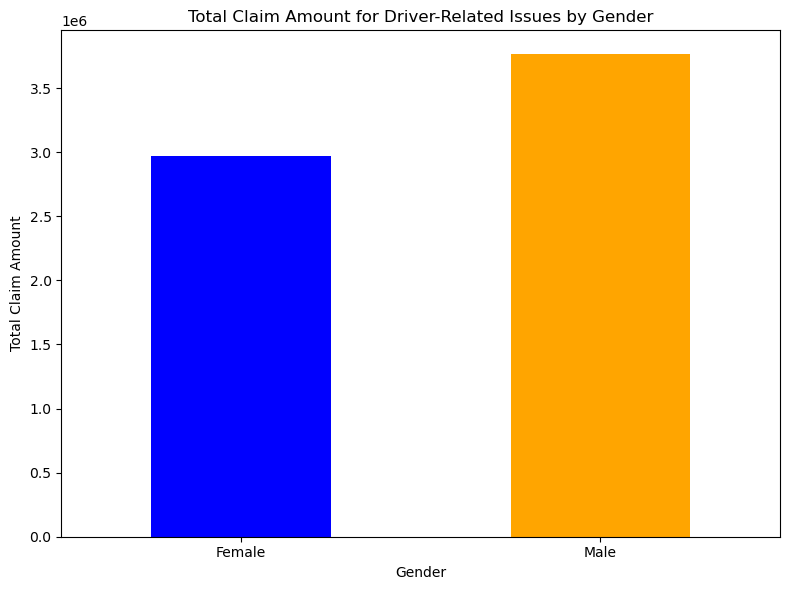

In [51]:
# Filter data for driver-related issues
driver_related_issues = temp_df[temp_df['incident_cause'].str.contains('driver', case=False)]

# Group by gender and sum the claim_amount for driver-related issues
gender_claims = driver_related_issues.groupby('gender')['claim_amount'].sum()

# Plot a bar chart to compare the total claim amounts by gender for driver-related issues
gender_claims.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))

# Add labels and title
plt.title('Total Claim Amount for Driver-Related Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the bar chart
plt.show()

In [52]:
13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.

SyntaxError: invalid syntax (2101997994.py, line 1)

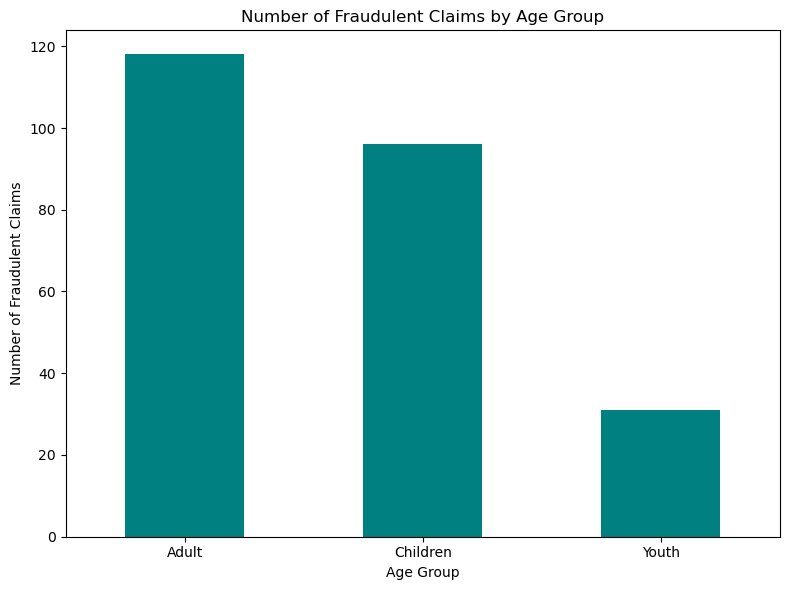

In [53]:
# Calculate Age
current_date = datetime.now()
temp_df['age'] = (current_date - temp_df['DateOfBirth']).dt.days // 365

# Categorize age groups
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

temp_df['age_group'] = temp_df['age'].apply(categorize_age)

# Filter data for fraudulent claims
fraudulent_claims = temp_df[temp_df['fraudulent'] == 'Yes']

# Group by age group and count the fraudulent claims
fraudulent_count = fraudulent_claims['age_group'].value_counts()

# Plot a bar chart to visualize the number of fraudulent claims by age group
fraudulent_count.plot(kind='bar', color='teal', figsize=(8, 6))

# Add labels and title
plt.title('Number of Fraudulent Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the bar chart
plt.show()

In [54]:
14. Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.

SyntaxError: invalid character '“' (U+201C) (1038026126.py, line 2)

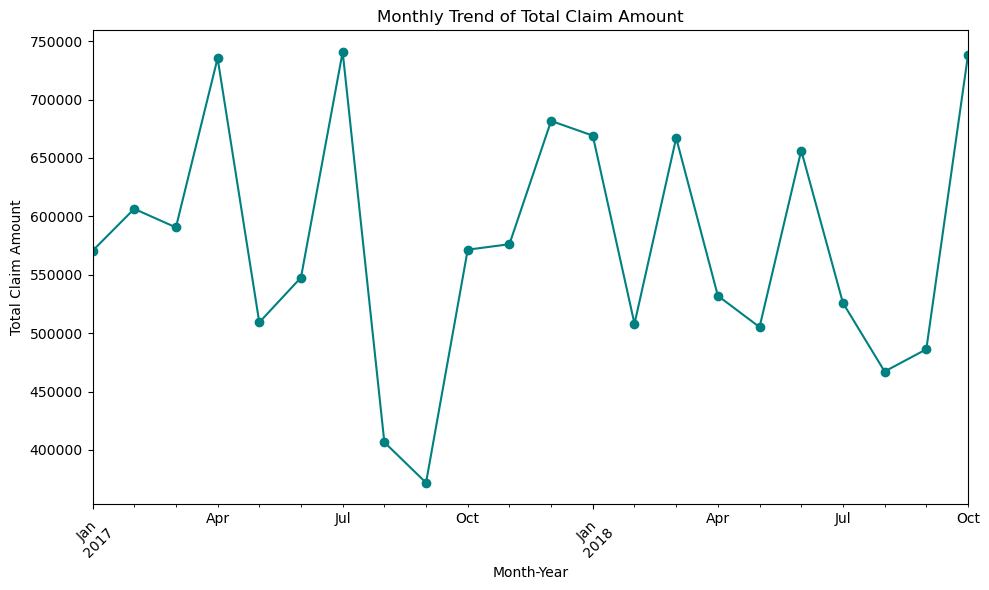

In [55]:

# Extract month and year from the 'claim_date'
temp_df['month_year'] = temp_df['claim_date'].dt.to_period('M')

# Group by the month-year and sum the claim_amount
monthly_trend = temp_df.groupby('month_year')['claim_amount'].sum()

# Plot the monthly trend
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='line', marker='o', color='teal')

# Add labels and title
plt.title('Monthly Trend of Total Claim Amount')
plt.xlabel('Month-Year')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()

In [56]:
15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

SyntaxError: invalid syntax (1582605844.py, line 1)

In [57]:
import seaborn as sns

temp_df['age_group'] = temp_df['age'].apply(categorize_age)

# Group by gender, age_group, and fraudulent to calculate average claim amount
avg_claims = temp_df.groupby(['gender', 'age_group', 'fraudulent'])['claim_amount'].mean().reset_index()

# Create a facetted bar chart using seaborn
g = sns.FacetGrid(avg_claims, col="fraudulent", height=6, aspect=1.5)
g.map(sns.barplot, 'age_group', 'claim_amount', 'gender', palette="muted")

# Set titles and labels
g.set_axis_labels('Age Group', 'Average Claim Amount')
g.set_titles(col_template="{col_name} Claims")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [58]:
Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 
16. Is there any similarity in the amount claimed by males and females?
17. Is there any relationship between age category and segment?
18. The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000.
19. Is there any difference between age groups and insurance claims?
20. Is there any relationship between total number of policy claims and the 
claimed amount?

SyntaxError: invalid syntax (1864585060.py, line 1)

In [59]:
from scipy.stats import ttest_ind, ttest_1samp, chi2_contingency, f_oneway, pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [60]:
#16
# Group data by gender and perform t-test
male_claims = temp_df[temp_df['gender'] == 'Male']['claim_amount']
female_claims = temp_df[temp_df['gender'] == 'Female']['claim_amount']

# Independent t-test
t_stat, p_value = ttest_ind(male_claims, female_claims)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


In [61]:
#17

temp_df['age_group'] = temp_df['age'].apply(categorize_age)

# Contingency table for Chi-Square test
contingency_table = pd.crosstab(temp_df['age_group'], temp_df['Segment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square: {chi2}, P-value: {p}")

Chi-Square: 1.913796088561538, P-value: 0.7516101889487933


In [62]:
#18
# One-sample t-test
current_year_data = temp_df['claim_amount']  # Assuming all data is from the current year
t_stat, p_value = ttest_1samp(current_year_data, 10000)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


In [63]:
#19
# Perform one-way ANOVA
grouped_data = [temp_df[temp_df['age_group'] == group]['claim_amount'] for group in temp_df['age_group'].unique()]
f_stat, p_value = f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Post-hoc analysis
posthoc = pairwise_tukeyhsd(temp_df['claim_amount'], temp_df['age_group'])
print(posthoc)


F-statistic: nan, P-value: nan
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1   group2  meandiff p-adj lower upper reject
---------------------------------------------------
   Adult Children      nan   nan   nan   nan  False
   Adult    Youth      nan   nan   nan   nan  False
Children    Youth      nan   nan   nan   nan  False
---------------------------------------------------


In [80]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 888 to 747
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   object        
 1   customer_id          1078 non-null   object        
 2   incident_cause       1078 non-null   category      
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   category      
 5   police_report        1078 non-null   category      
 6   claim_type           1078 non-null   category      
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1078 non-null   float64       
 9   fraudulent           1078 non-null   category      
 10  gender               1078 non-null   category      
 11  DateOfBirth          1078 non-null   datetime64[ns]
 12  State                1078 non-null   category      
 13  Contact              1078 non-null   

In [65]:
#20
# Pearson Correlation
correlation, p_value = pearsonr(temp_df['total_policy_claims'], temp_df['claim_amount'])
print(f"Correlation Coefficient: {correlation}, P-value: {p_value}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_policy_claims', y='claim_amount', data=df)
plt.title('Relationship Between Total Policy Claims and Claim Amount')
plt.xlabel('total_policy_claims')
plt.ylabel('claim_amount')
plt.show()


ValueError: array must not contain infs or NaNs

In [69]:
temp_df.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
alter_flag               0
Age                      0
Age_Category           401
age                      0
age_group                0
month_year               0
dtype: int64